# Final Project
## Network Science HS19
### Imports

In [72]:
import geopandas as gpd
import fiona
import networkx as nx
import matplotlib.pyplot as plt
import folium
import random

### Load the data

In [41]:
#create a list of layers with in a file geodatabase 
layerlist = fiona.listlayers('./Schienennetz_LV03_20171210.gdb')
#print(layerlist)
netzknoten = gpd.read_file('./Schienennetz_LV03_20171210.gdb',layer='Netzknoten')
display(netzknoten.head())
netzsegment = gpd.read_file('./Schienennetz_LV03_20171210.gdb',layer='Netzsegment')
display(netzsegment.head())


,xtf_id,Betriebspunkt_Nummer,Betriebspunkt_Name,Betriebspunkt_Abkuerzung,Betriebspunkt_DatenherrAbkuer,BeginnGueltigkeit,EndeGueltigkeit,BearbeitungsDatum,Stand,rUebergeordnet,geometry
0,ch14uvag00092584,8580567,"Wabern, Eichholz",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (600987.900 197507.600)
1,ch14uvag00092599,8590023,"Bern, Sandrain",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (600494.700 197843.500)
2,ch14uvag00092576,8588779,"Basel, Rheingasse",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (611516.009 267823.240)
3,ch14uvag00092992,8594239,"Zürich, Schiffbau",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (681630.957 249128.062)
4,ch14uvag00092591,8590020,"Bern, Kursaal",None,None,2014-10-01T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,None,POINT (600835.916 200203.663)


,xtf_id,Name,KmAnfang,KmEnde,Infrastrukturbetr_TUNummer,Infrastrukturbetr_TUAbkuerzung,AnzahlStreckengleise,Spurweite,Elektrifizierung,BeginnGueltigkeit,EndeGueltigkeit,BearbeitungsDatum,Stand,rAnfangsknoten,rEndknoten,rKmLinie,SHAPE_Length,geometry
0,ch14uvag00220884,8589351_8589303,1.185,1.510,303,BVB,2,mm1000,Gleichstrom,2017-12-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00092887,ch14uvag00092837,ch14uvag00090320,325.030914,"MULTILINESTRING ((610431.369 267713.044, 61033..."
1,ch14uvag00088467,TLH_OSS,11.838,19.472,1,SBB CFF FFS,1,mm1435,Wechselstrom_16_7Hz,2014-09-03T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00090017,ch14uvag00089678,ch14uvag00086923,7633.463127,"MULTILINESTRING ((699241.356 269603.880, 69924..."
2,ch14uvag00095746,8590881_8587655,2.514,3.123,560,VBG,2,mm1000,Gleichstrom,2014-11-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00092984,ch14uvag00092985,ch14uvag00090371,608.838025,"MULTILINESTRING ((686482.890 252035.763, 68652..."
3,ch14uvag00220957,8591177_8599994,0.000,0.482,346,VBZ,1,mm1000,Gleichstrom,2017-12-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00092803,ch14uvag00220965,ch14uvag00220961,481.561851,"MULTILINESTRING ((681272.495 248498.306, 68126..."
4,ch14uvag00220958,8599995_8599994,0.000,0.190,346,VBZ,2,mm1000,Gleichstrom,2017-12-10T00:00:00,None,2017-12-12T00:00:00,2017-12-10T00:00:00,ch14uvag00220968,ch14uvag00220965,ch14uvag00220960,189.914409,"MULTILINESTRING ((681584.273 249057.490, 68157..."


### Create the network graph

In [32]:
#The nodes have their name and geometry(location) associated
G = nx.Graph()
for index, row in netzknoten.iterrows():
    G.add_node(row.xtf_id, geometry = row.geometry, name = row.Betriebspunkt_Name)
    
for index, row in netzsegment.iterrows():
    G.add_edge(row.rAnfangsknoten, row.rEndknoten)


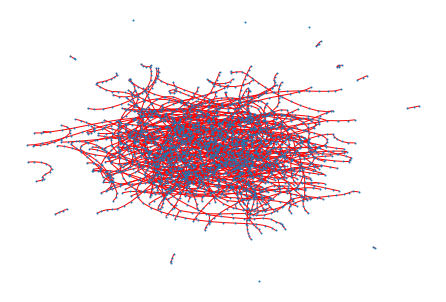

In [5]:
nx.draw(G, node_size=1, edge_color="r")

In [9]:
# Transformation of the coordinates to different Coordinate Reference System (CRS)

netzknoten_crs4326 = netzknoten.to_crs(epsg = 4326)
netzsegment_crs4326 = netzsegment.to_crs(epsg = 4326)
#netzknoten_crs4326.head()
#netzsegment_crs4326.head()

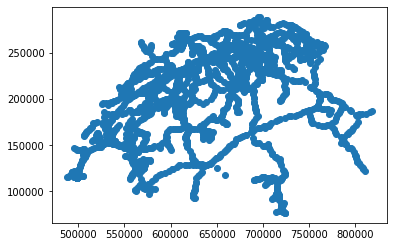

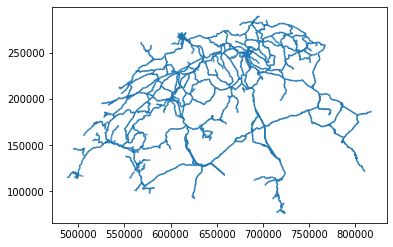

In [42]:
# Plot of the Stations and lines
netzknoten.plot()
netzsegment.plot()

In [19]:
# Locate all the trainstations on an interactive map (seems not to be very useful)
m = folium.Map(location = [47.368650, 8.539183], zoom_start = 9)

for index, row in netzknoten_crs4326.iterrows():
    folium.Marker([row.geometry.y,row.geometry.x]).add_to(m)
    
m.save('map.html')

[4, 235, 2490, 378, 67, 11, 3, 1, 0, 1]


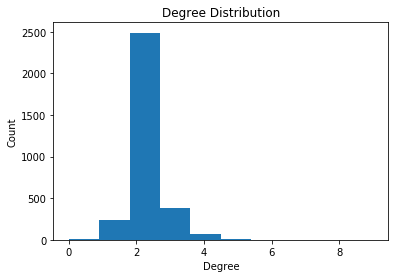

In [50]:
#Degree Distribution of the network
hist = nx.degree_histogram(G)
print(hist)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.hist(degree_sequence, bins = len(hist))
                     
plt.show()

In [59]:
#Some figures for the network: average degree <k>, global clustering coefficient C, assortativity etc.
degree_sequence = [d for n, d in G.degree()]

average_degree = sum(degree_sequence)/len(degree_sequence)
print("average degree ⟨k⟩ =",average_degree)

C = sum(nx.clustering(G).values())/len(nx.clustering(G).values())
print("global clustering C=", C)

assortativity = nx.degree_assortativity_coefficient(G)
print("assortativity=",assortativity)

print("number of connected components= ", nx.number_connected_components(G))

largest_cc = max(nx.connected_components(G), key=len)
number_largest_cc = len(largest_cc) 
number_nodes = len(G.nodes())
print("Relative size of the giant component to the full network =", number_largest_cc/number_nodes)


average degree ⟨k⟩ = 2.102194357366771
global clustering C= 0.015946161118574925
assortativity= 0.19889027126014727
number of connected components=  47
Relative size of the giant component to the full network = 0.5250783699059561


In [61]:
#Centralities  (Do we need the correlations between them??)
degree = sorted(list(nx.degree_centrality(G).values()), reverse =True)
closeness = sorted(list(nx.closeness_centrality(G).values()), reverse =True)
betweenness = sorted(list(nx.betweenness_centrality(G).values()), reverse =True)
eigenvector = sorted(list(nx.eigenvector_centrality(G).values()), reverse =True)

print(max(degree))
print(max(closeness))
print(max(betweenness))
print(max(eigenvector))


0.002822201317027281
0.013534777445549909
0.11844650721988634
0.48696013737582694


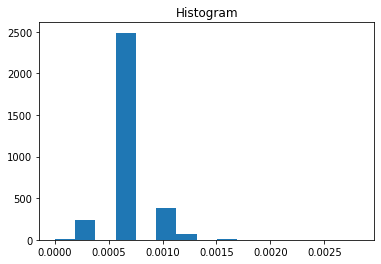

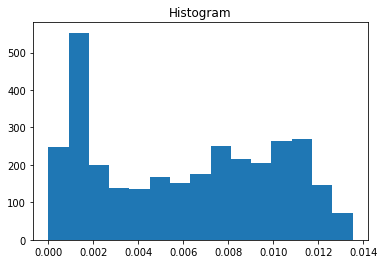

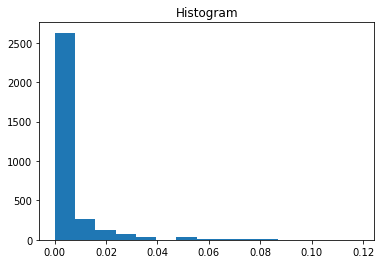

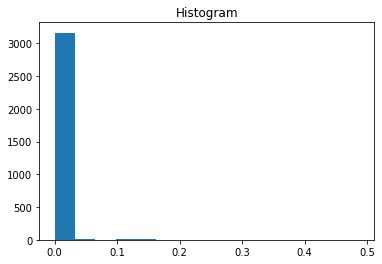

In [68]:
# Distribution of the centralities
def histogram(data, bins):
    plt.title("Histogram")
    plt.hist(data,bins=bins)
    plt.show()

histogram(degree,15)
histogram(closeness,15)
histogram(betweenness,15)
histogram(eigenvector, 15)

In [73]:
def random_attacks(G):
    temp = G.copy()
    connected_component_sizes = []
    while nx.number_of_nodes(temp) > 1:
        node_list = temp.nodes()
        to_delete = random.choice(list(node_list))
        temp.remove_node(to_delete)
        
        largest_cc = len(max(nx.connected_components(temp), key=len))
        connected_component_sizes.append(largest_cc)
    
    plt.plot(range(len(connected_component_sizes)),connected_component_sizes)
    plt.title("Random attacks")
    plt.ylabel("Size of Giant component")
    plt.xlabel("Number of removed Nodes")
    plt.show()
    
def targeted_attacks(G):
    temp = G.copy()
    connected_component_sizes = []
    node_degrees = nx.degree_centrality(temp)
    sorted_node_degrees = sorted(temp.nodes(), key=lambda n: node_degrees[n])
    while nx.number_of_nodes(temp) > 1:
        temp.remove_node(sorted_node_degrees.pop())
        largest_cc = len(max(nx.connected_components(temp), key=len))
        connected_component_sizes.append(largest_cc)
    
    plt.plot(range(len(connected_component_sizes)),connected_component_sizes)
    plt.title("Targeted attacks")
    plt.ylabel("Size of Giant component")
    plt.xlabel("Number of removed Nodes")
    plt.show()

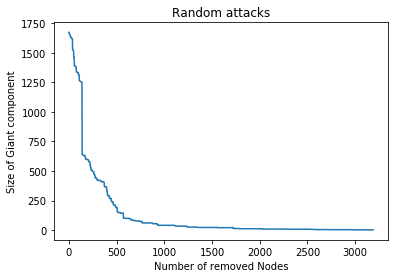

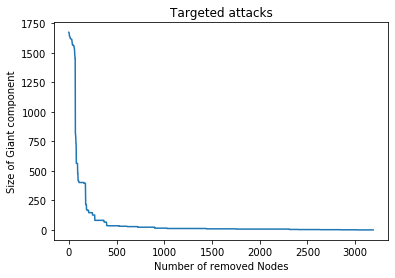

In [74]:
#Incluence of Random or targeted attacks on the remaining size of the Giant component
random_attacks(G)
targeted_attacks(G)